In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# 10. This question should be answered using the Carseats data set

In [2]:
carseats = pd.read_csv(r'C:\Users\Kushal Garg\ML\Introduction to statistical learning\Datasets\Carseats.csv')

print(carseats.shape)
carseats.head()


(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
shelveloc_mapping = {'Bad':0,'Good':1,'Medium':2}
yes_no_mapping = {'Yes':1,'No':0}

In [5]:
carseats['ShelveLoc'] = carseats['ShelveLoc'].map(shelveloc_mapping)
carseats['Urban'] = carseats['Urban'].map(yes_no_mapping)
carseats['US'] = carseats['US'].map(yes_no_mapping)

In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

## (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [8]:
import statsmodels.formula.api as smf
result=smf.ols('Sales~ Price+Urban+US',data=carseats).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.39e-23
Time:                        09:50:17   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

## (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

####  From the coeffiecents we can see that  the Price and Urban are negatively related to Sales, and US is positively related. Looking at the p values, Price and Us have significant p-values, but Urban has a very high p values ,and its better that we exclude it from the model

## (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

#### Sales = 13.0435 - 0.545*Price - 0.0219*Urban + 1.2006*US 

## (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

#### Although all the predictors are having coefficients non zero, but since Urban has a high p-value, we will not use it as a predictor

## (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [9]:
result = smf.ols('Sales ~ Price + US',data = carseats).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.66e-24
Time:                        09:54:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## (f) How well do the models in (a) and (e) fit the data?

#### Removing the Urban from the first model, there is no change in the R2 value in the second model. Through this we can also conclude that Urban has no say in the prediction of the response, hence its better to use the model with two predictors

## (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [10]:
# for the confidence interval we use the formula coeff +/- 2*stddev(coeff)
print('With 95% confidence the range for Price coefficient is ',[-0.0545-2*0.005,-0.0545+2*0.005])
print('With 95% confidence the range for US coefficent is ',[1.1996-2*0.258,1.1996+2*0.258])

With 95% confidence the range for Price coefficient is  [-0.0645, -0.0445]
With 95% confidence the range for US coefficent is  [0.6836, 1.7156]


## (h) Is there evidence of outliers or high leverage observations in the model from (e)?

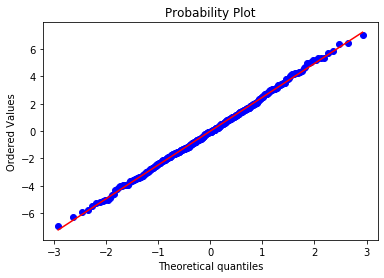

In [11]:
from scipy import stats
ax=stats.probplot(result.resid, dist='norm',plot=plt)

Text(0.5, 1.0, 'Residual-Leverage Plot ')

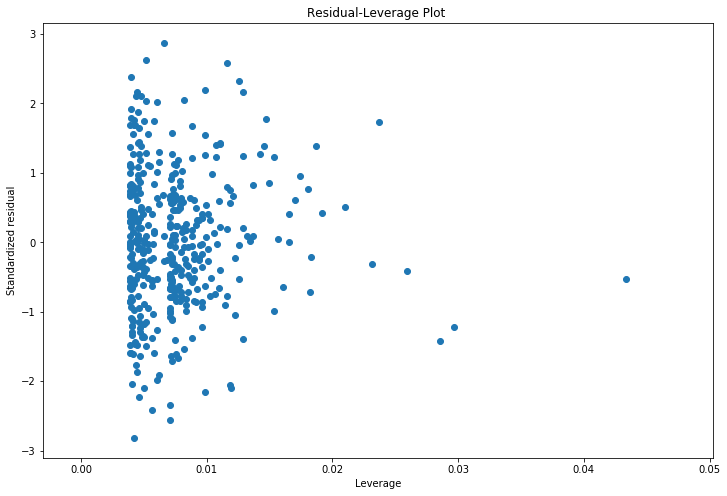

In [12]:
plt.figure(figsize = (12,8))

# leverage, from statsmodels internals
model_leverage = result.get_influence().hat_matrix_diag
model_norm_residuals = result.get_influence().resid_studentized_internal

plt.scatter(model_leverage,model_norm_residuals )

plt.xlabel('Leverage')
plt.ylabel('Standardized residual')
plt.title('Residual-Leverage Plot ')

#### From the abobe two plots we can conclude there is no outliers as such but there is one leverage point where leverage> 0.04 . 